In [2]:
#load the necessary packages
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#import the data
data = keras.datasets.mnist

In [3]:
#load the data
(train_images, train_labels),(test_images, test_labels) = data.load_data()

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
#verifying the data
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

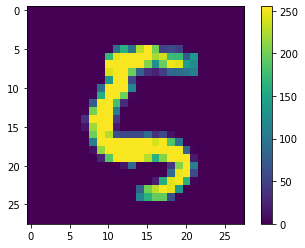

In [6]:
plt.figure()
plt.imshow(train_images[2000])
plt.colorbar()
plt.grid(False)
plt.show()

In [7]:
train_images = train_images/255.0
test_images = test_images/255.0

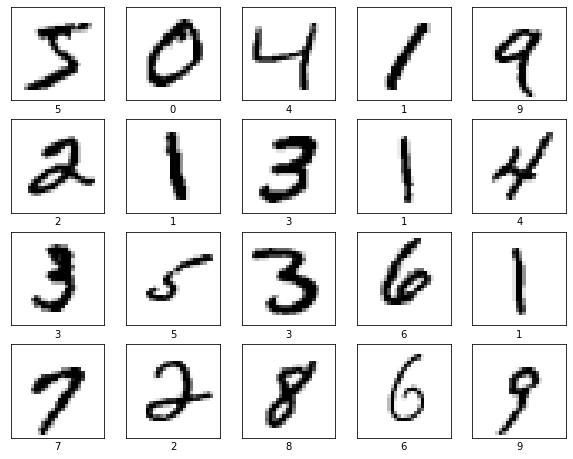

In [8]:
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

In [9]:
#building the model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

2022-04-01 09:02:29.676564: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-04-01 09:02:29.681121: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 4. Tune using inter_op_parallelism_threads for best performance.


In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy']
             )

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10


In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels,verbose=2)

In [ ]:
prob_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [ ]:
pred = prob_model.predict(test_images)

In [1]:
pred[1]

NameError: name 'pred' is not defined

In [17]:
np.argmax(pred[1])

2

In [18]:
test_labels[1000]

9

In [19]:
plt.figure()


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

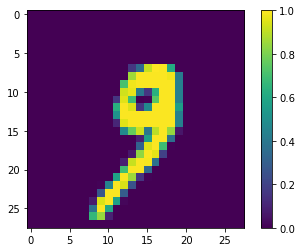

In [20]:
plt.figure()
plt.imshow(test_images[1000])
plt.colorbar()
plt.grid(False)
plt.show()

##### CNN image Classifier

In [21]:
#import the dependencies
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import numpy as np
import matplotlib.pyplot as plt

In [22]:
#load and prepare the data
(train_images, train_labels),(test_images,test_labels) = datasets.fashion_mnist.load_data()

In [23]:
train_images.shape

(60000, 28, 28)

In [24]:
test_images.shape

(10000, 28, 28)

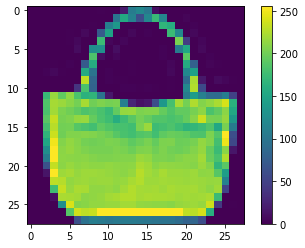

In [25]:
plt.figure()
plt.imshow(train_images[100])
plt.colorbar()
plt.grid(False)
plt.show()

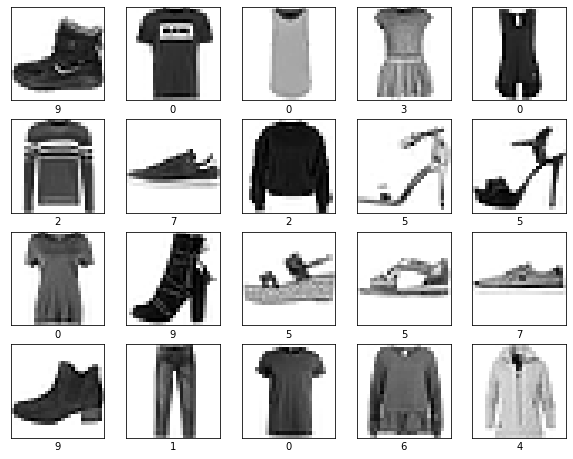

In [26]:
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

In [27]:
#reshape and normalize images
train_images = train_images.reshape(-1,28,28,1).astype('float32')/255
test_images = test_images.reshape(-1,28,28,1).astype('float32')/25

In [28]:
train_images.shape

(60000, 28, 28, 1)

In [29]:
test_images.shape

(10000, 28, 28, 1)

In [30]:
train_labels = train_labels.astype('float32')
test_labels = test_labels.astype('float32')

In [31]:
train_images = train_images[:-10000]
train_labels = train_labels[:-10000]
val_images = train_images[-10000:]
val_labels = train_labels[-10000:]

In [32]:
val_images.shape

(10000, 28, 28, 1)

In [33]:
#build the model
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPool2D(2,2))

In [34]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [36]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                346176    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 347,146
Trainable params: 347,146
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy']
                )                                               